In [1]:
import pandas as pd 
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
comp=pd.read_csv("E:/Ravi_ExcelR_Assignments/Random_Forest/Company_Data.csv")
comp 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
comp.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [4]:
sales_mean=comp.Sales.mean()
sales_mean

7.496325

In [5]:
label_encoder = preprocessing.LabelEncoder()
comp['Sales']= label_encoder.fit_transform(comp['Sales']>=sales_mean) 

In [6]:
#filling categorical variable with dummy values
comp=pd.get_dummies(comp,columns=['ShelveLoc','Urban','US']) 
comp 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,0,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,0,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,0,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:
#Data Structure 
comp.shape

(400, 15)

In [8]:
#data types
comp.dtypes 

Sales               int64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
Age                 int64
Education           int64
ShelveLoc_Bad       uint8
ShelveLoc_Good      uint8
ShelveLoc_Medium    uint8
Urban_No            uint8
Urban_Yes           uint8
US_No               uint8
US_Yes              uint8
dtype: object

In [9]:
comp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sales             400 non-null    int64
 1   CompPrice         400 non-null    int64
 2   Income            400 non-null    int64
 3   Advertising       400 non-null    int64
 4   Population        400 non-null    int64
 5   Price             400 non-null    int64
 6   Age               400 non-null    int64
 7   Education         400 non-null    int64
 8   ShelveLoc_Bad     400 non-null    uint8
 9   ShelveLoc_Good    400 non-null    uint8
 10  ShelveLoc_Medium  400 non-null    uint8
 11  Urban_No          400 non-null    uint8
 12  Urban_Yes         400 non-null    uint8
 13  US_No             400 non-null    uint8
 14  US_Yes            400 non-null    uint8
dtypes: int64(8), uint8(7)
memory usage: 27.9 KB


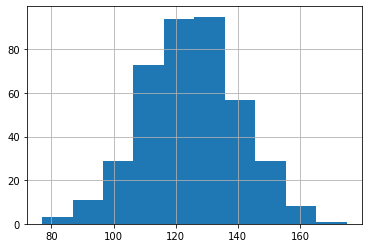

In [11]:
# histogram of CompPrice
comp['CompPrice'].hist() 

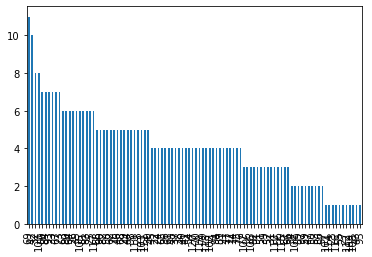

In [12]:
#Bar plot
comp['Income'].value_counts().plot.bar()  

In [13]:
comp.describe() 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.49750,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,0.240000,0.212500,0.547500,0.295000,0.705000,0.355000,0.645000
std,0.50062,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,0.427618,0.409589,0.498362,0.456614,0.456614,0.479113,0.479113
min,0.00000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.00000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.00000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
comp.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
dtype: int64

In [15]:
x=comp.iloc[:,1:]
y=comp['Sales']

In [16]:
x
pd.set_option("display.max_rows", None) 

In [17]:
x 

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
5,124,113,13,501,72,78,16,1,0,0,1,0,0,1
6,115,105,0,45,108,71,15,0,0,1,0,1,1,0
7,136,81,15,425,120,67,10,0,1,0,0,1,0,1
8,132,110,0,108,124,76,10,0,0,1,1,0,1,0
9,132,113,0,131,124,76,17,0,0,1,1,0,0,1


In [18]:
y
pd.set_option("display.max_rows", None) 

In [19]:
y 

0      1
1      1
2      1
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     0
21     1
22     0
23     0
24     1
25     1
26     1
27     0
28     0
29     1
30     1
31     1
32     0
33     1
34     0
35     1
36     1
37     0
38     0
39     0
40     0
41     1
42     1
43     0
44     0
45     0
46     1
47     0
48     0
49     1
50     0
51     0
52     1
53     0
54     0
55     0
56     1
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     0
66     1
67     1
68     1
69     1
70     1
71     0
72     0
73     1
74     0
75     1
76     1
77     1
78     0
79     1
80     1
81     1
82     1
83     0
84     0
85     1
86     1
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    0
109    1
110    1
1

In [20]:
# Random Forest Classification
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)

C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [21]:
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [22]:
results = cross_val_score(model, x, y, cv=kfold) 

In [23]:
print(results.mean()) 

0.8049999999999999


In [25]:
array = comp.values
X = array[:, 1:]
Y = array[:, 0]

In [26]:
#Boosting

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv

In [28]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [29]:
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\Ravi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [31]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.55%


In [32]:
predictions

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0]

In [33]:
#Light GBM

In [34]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train) 

In [35]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [36]:
clf = lgb.train(params, d_train, 500) 

[LightGBM] [Info] Number of positive: 137, number of negative: 131
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511194 -> initscore=0.044784
[LightGBM] [Info] Start training from score 0.044784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [37]:
#Prediction
y_pred=clf.predict(X_test) 

In [38]:
predictions = [round(value) for value in y_pred]

In [39]:
accuracy = accuracy_score(y_test, predictions)

In [40]:
accuracy 

0.6742424242424242

In [41]:
predictions 

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [42]:
# AdaBoost Classification

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [44]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [45]:
results = cross_val_score(model, X, Y, cv=kfold)

In [46]:
print(results.mean())

0.7975


In [47]:
# Bagged Classification

In [48]:
seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100

C:\Users\Ravi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [49]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

In [50]:
results = cross_val_score(model, X, Y, cv=kfold)

In [51]:
print(results.mean()) 

0.805
